### Dataset link https://www.kaggle.com/c/titanic/data?select=train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('train.csv',index_col=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
def fill_na_age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ()) 
        return x
    return 
df[colname].apply(fill_empty).astype(int) 
df['Age'] = fill_na_age(df, 'Age')
def create_feat_familly_size(df):
    return df['SibSp'] + df['Parch'] + 1
df['FamilySize1] = create_feat_familly_size(df)
def create_feat_isalone(df, colname):
   def _is_alone(x):
        if x==1:
            return 1
        return 0
    return df[colname].apply(_is_alone)
df['IsAlone'] = create_feat_isalone(df, 'FamilySize')
def create_feat_categoricalFare(df, colname):
    return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int) 
df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')
def create_feat_categoricalAge(df, colname):
    return pd.qcut(df[colname], 5, labels = [0, 1, 2, 3, 4]).astype(int)
df['CategoricalAge'] = create_feat_categoricalAge(df, 'Age')
def create_feat_categoricalAge(df, colname):
    return pd.qcut(df[colname], 5, labels = [0, 1, 2, 3, 4]).astype(int)
df['CategoricalAge'] = create_feat_categoricalAge(df, 'Age')
import re
def create_feat_title(df, colname): 
   def find_title(x):
        title_search = re.search(' ([A-Za-z]+)\.', x)
        if title_search:
            title = title_search.group(1)
            if title in ['Mlle', 'Ms']:
                return 'Miss'
            elif title in ['Mme', 'Mrs']:
                return 'Mrs'
            elif title=='Mr':
                return 'Mr' 
            else:
                return 'Rare'
        return ""
    return_title= df[colname].apply(find_title) 
    dict_title = {'Miss': 1, 'Mrs':2, 'Mr':3, 'Rare':4}
    return return_title.replace(dict_title)
df['Title'] = create_feat_title(df, 'Name')
def create_feat_sex(df,colname)
   def sex(x):
        if x=='male':
            return 1
        return 0
    return df[colname].apply(sex)
df['SexNumerical'] = create_feat_sex(df, 'Sex')
df['Embarked'] = df.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)

In [10]:
drop_list=['PassengerId','Cabin','Ticket','SibSp','Name']
titanic=df.drop(drop_list,axis=1)
corrmat=titanic.corr()
corrmat

,Survived,Pclass,Age,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.189119,0.096067
Parch,0.081629,0.018443,-0.189119,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.216225,1.000000


In [11]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


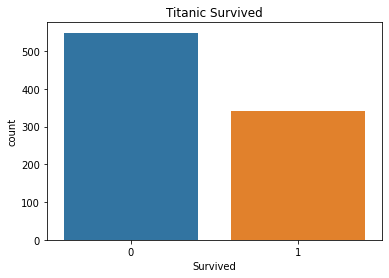

In [13]:
sns.countplot('Survived',data=titanic)
plt.title("Titanic Survived")
plt.show()

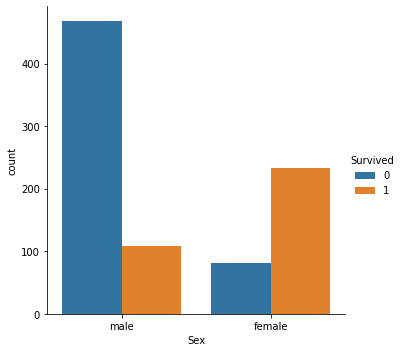

In [14]:
sns.catplot(x='Sex',hue="Survived",kind="count",data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

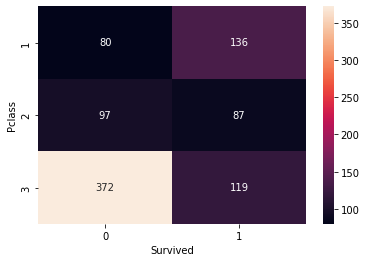

In [16]:
group=titanic.groupby(['Pclass','Survived'])
pclass_survived=group.size().unstack()
sns.heatmap(pclass_survived,annot=True,fmt="d")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

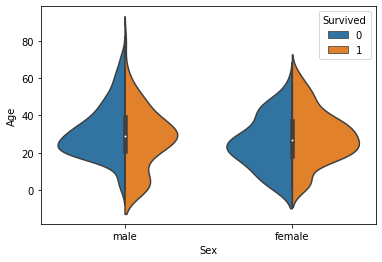

In [17]:
sns.violinplot(x='Sex',y='Age',hue="Survived", data=titanic,split=True)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

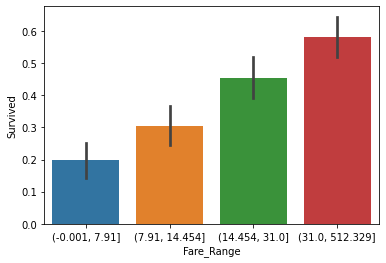

In [18]:
titanic['Fare_Range']=pd.qcut(titanic['Fare'],4)
sns.barplot(x='Fare_Range',y='Survived',data=titanic)

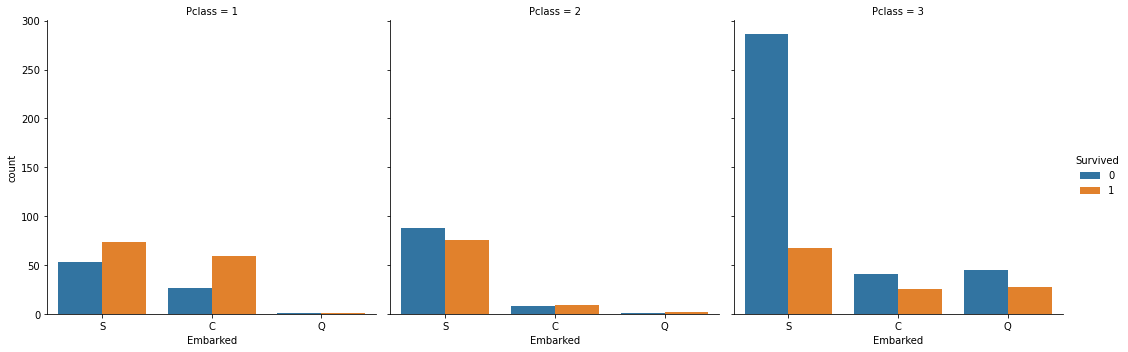

In [23]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = titanic)